# FIR LAB

https://klyshko.github.io/teaching/2019-02-22-teaching

import Libs

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile
import scipy
from scipy.signal import lfilter, firwin , freqz

Import Wav File and Show

C:\Users\vicoj\AppData\Local\Temp\ipykernel_7768\92572329.py:5: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate , data = wavfile.read(file_path)


number of channels = 2
length of sample= 9.258004535147393s
dtypr = int16


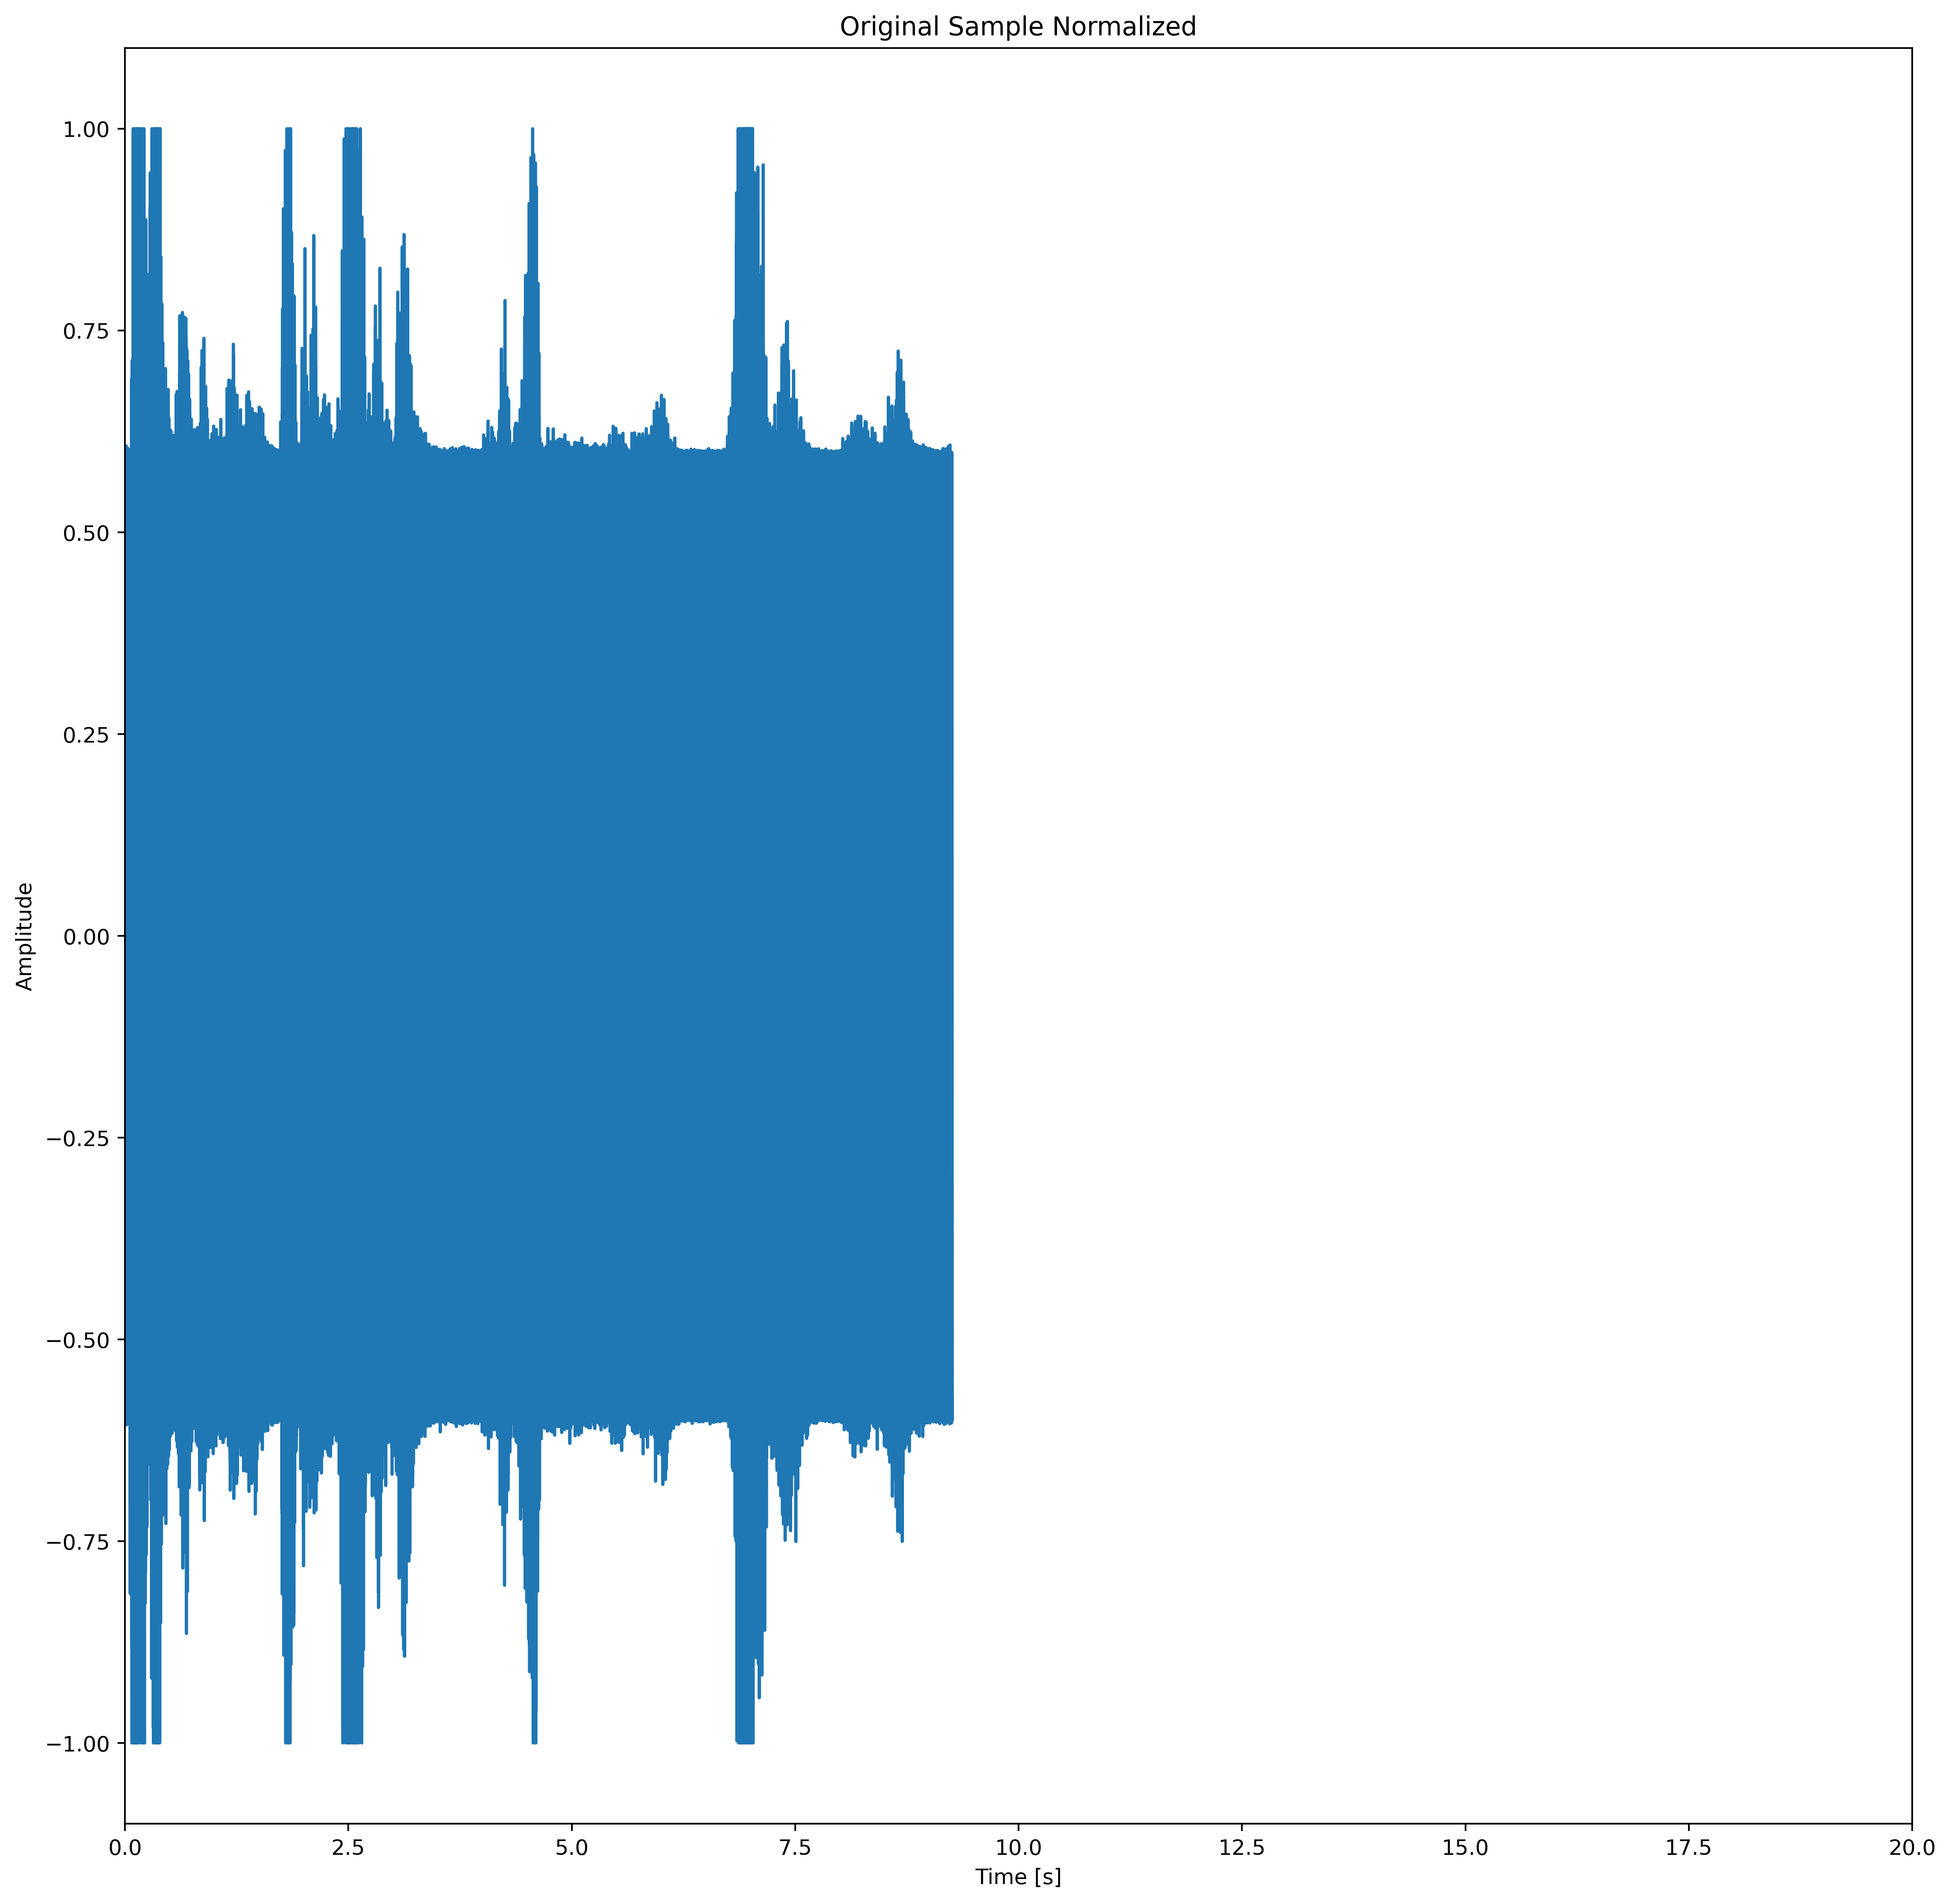

In [31]:
# Specify the path to your WAV file
file_path = 'speech_three-tones.wav'

# Read the WAV file
samplerate , data = wavfile.read(file_path)
length = data.shape[0] / samplerate

#Print infos of the data
print(f"number of channels = {data.shape[1]}")
print(f"length of sample= {length}s")
print(f"dtypr = {data.dtype}")

#Left Right channel
data_l = data[:, 0]
data_r = data[:, 1]

time = np.linspace(0., length, data.shape[0])
plt.title("Original Sample Normalized")
plt.plot(time,(data_l/((2**16)/2)), label="Left channel")
plt.xlim([0, 20]) 
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

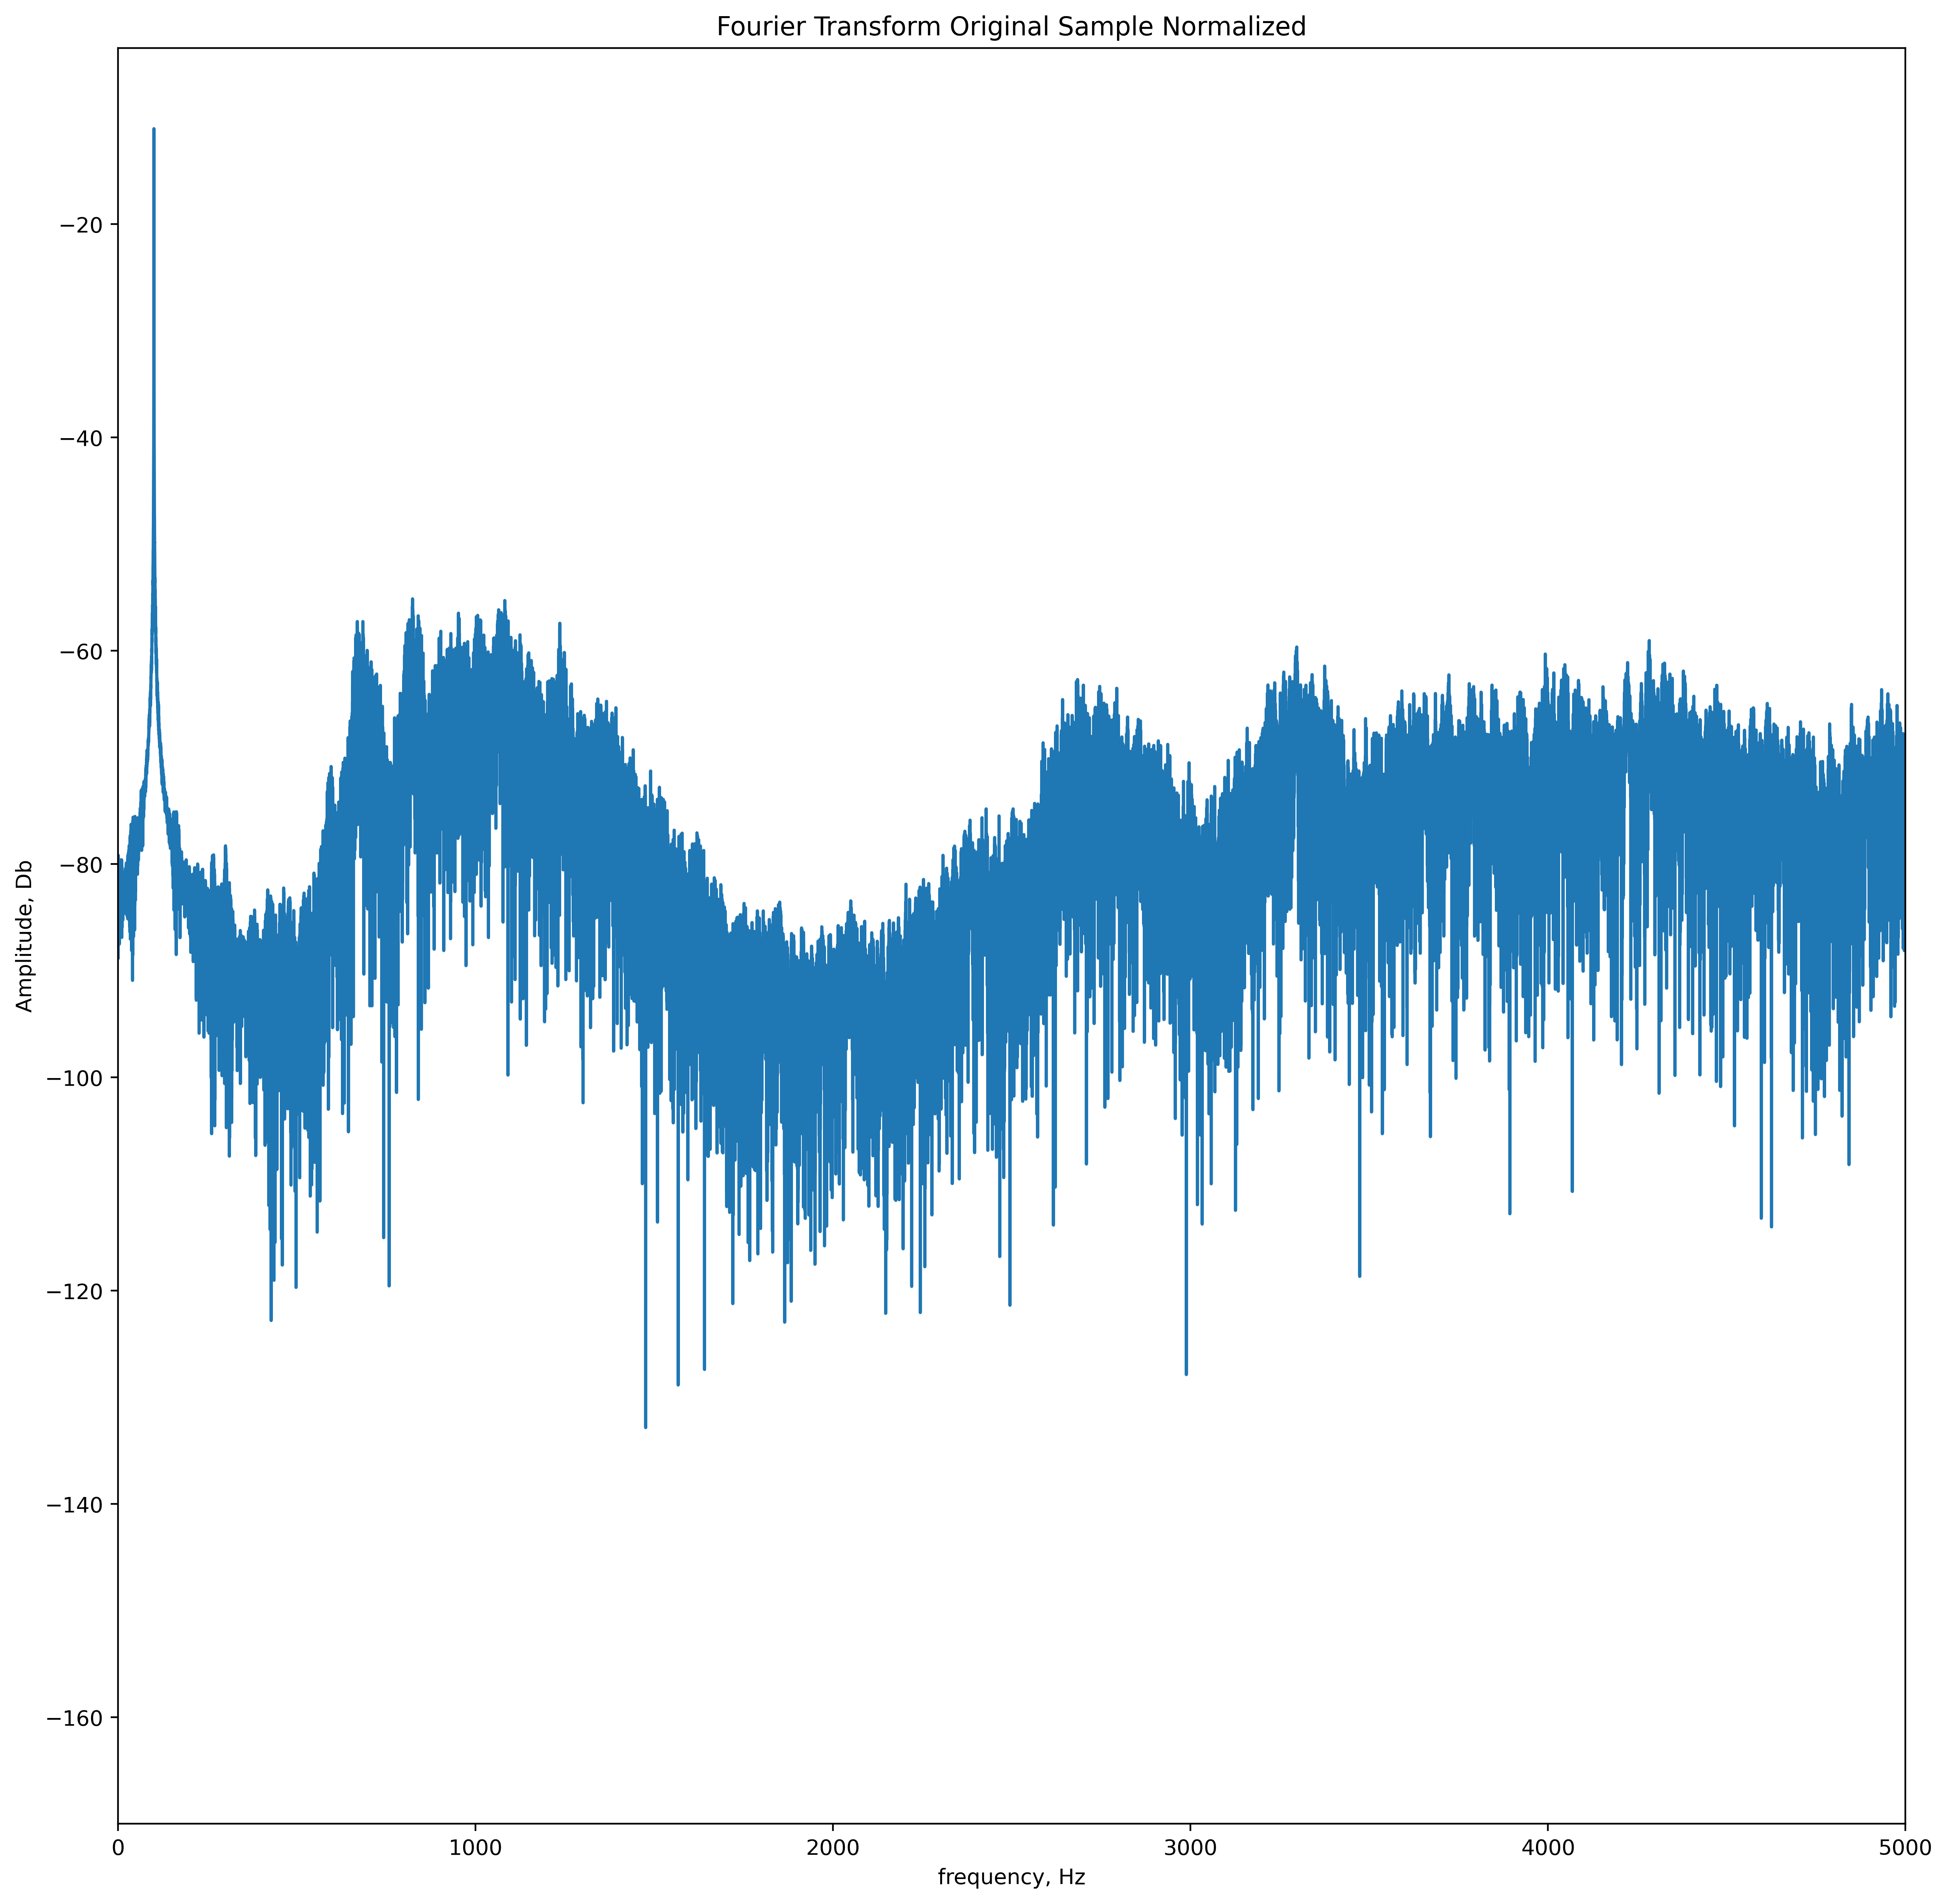

In [32]:
# computes the one-dimensional discrete Fourier transform (DFT)
fft_spectrum = np.fft.rfft(data_l)/((2**16)/2)
fft_spectrum_abs = np.abs(fft_spectrum)/data_l.size

freq = np.fft.rfftfreq(data_l.size, d=1./samplerate)

plt.title("Fourier Transform Original Sample Normalized")
plt.plot(freq, 20*np.log10(fft_spectrum_abs))
plt.xlim([0, 5000]) 
plt.xlabel("frequency, Hz")
plt.ylabel("Amplitude, Db")
plt.show()

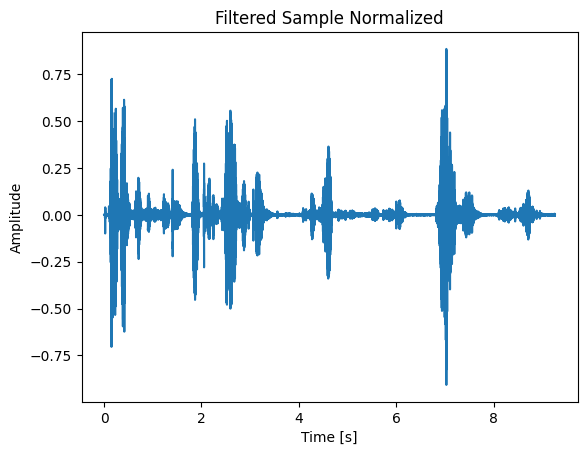

In [18]:
#Upper and lower frequency
f1, f2 = 200, 2200

#FIR Window
taps_BP = firwin(2001, [f1, f2],width=200, pass_zero=False,fs=samplerate)

# Use lfilter to filter x with the FIR filter.
filtered_FIR_BP_SP = lfilter(taps_BP, 1.0, data_l)

wavfile.write('filtered_FIR.wav', samplerate, filtered_FIR_BP_SP.astype(np.int16))

plt.title("Filtered Sample Normalized")
plt.plot(time, filtered_FIR_BP_SP/((2**16)/2), label="Left channel")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


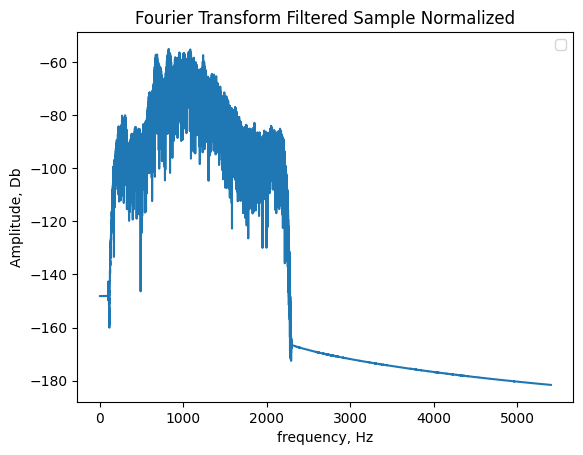

In [19]:
fft_spectrum = np.fft.rfft(filtered_FIR_BP_SP)/((2**16)/2)
freq = np.fft.rfftfreq(filtered_FIR_BP_SP.size, d=1./samplerate)
fft_spectrum_abs = np.abs(fft_spectrum)/filtered_FIR_BP_SP.size

plt.plot(freq,20*np.log10(fft_spectrum_abs))
plt.xlim([0, 5000]) 
plt.title("Fourier Transform Filtered Sample Normalized")
plt.xlabel("frequency, Hz")
plt.ylabel("Amplitude, Db")
plt.legend()
plt.show()

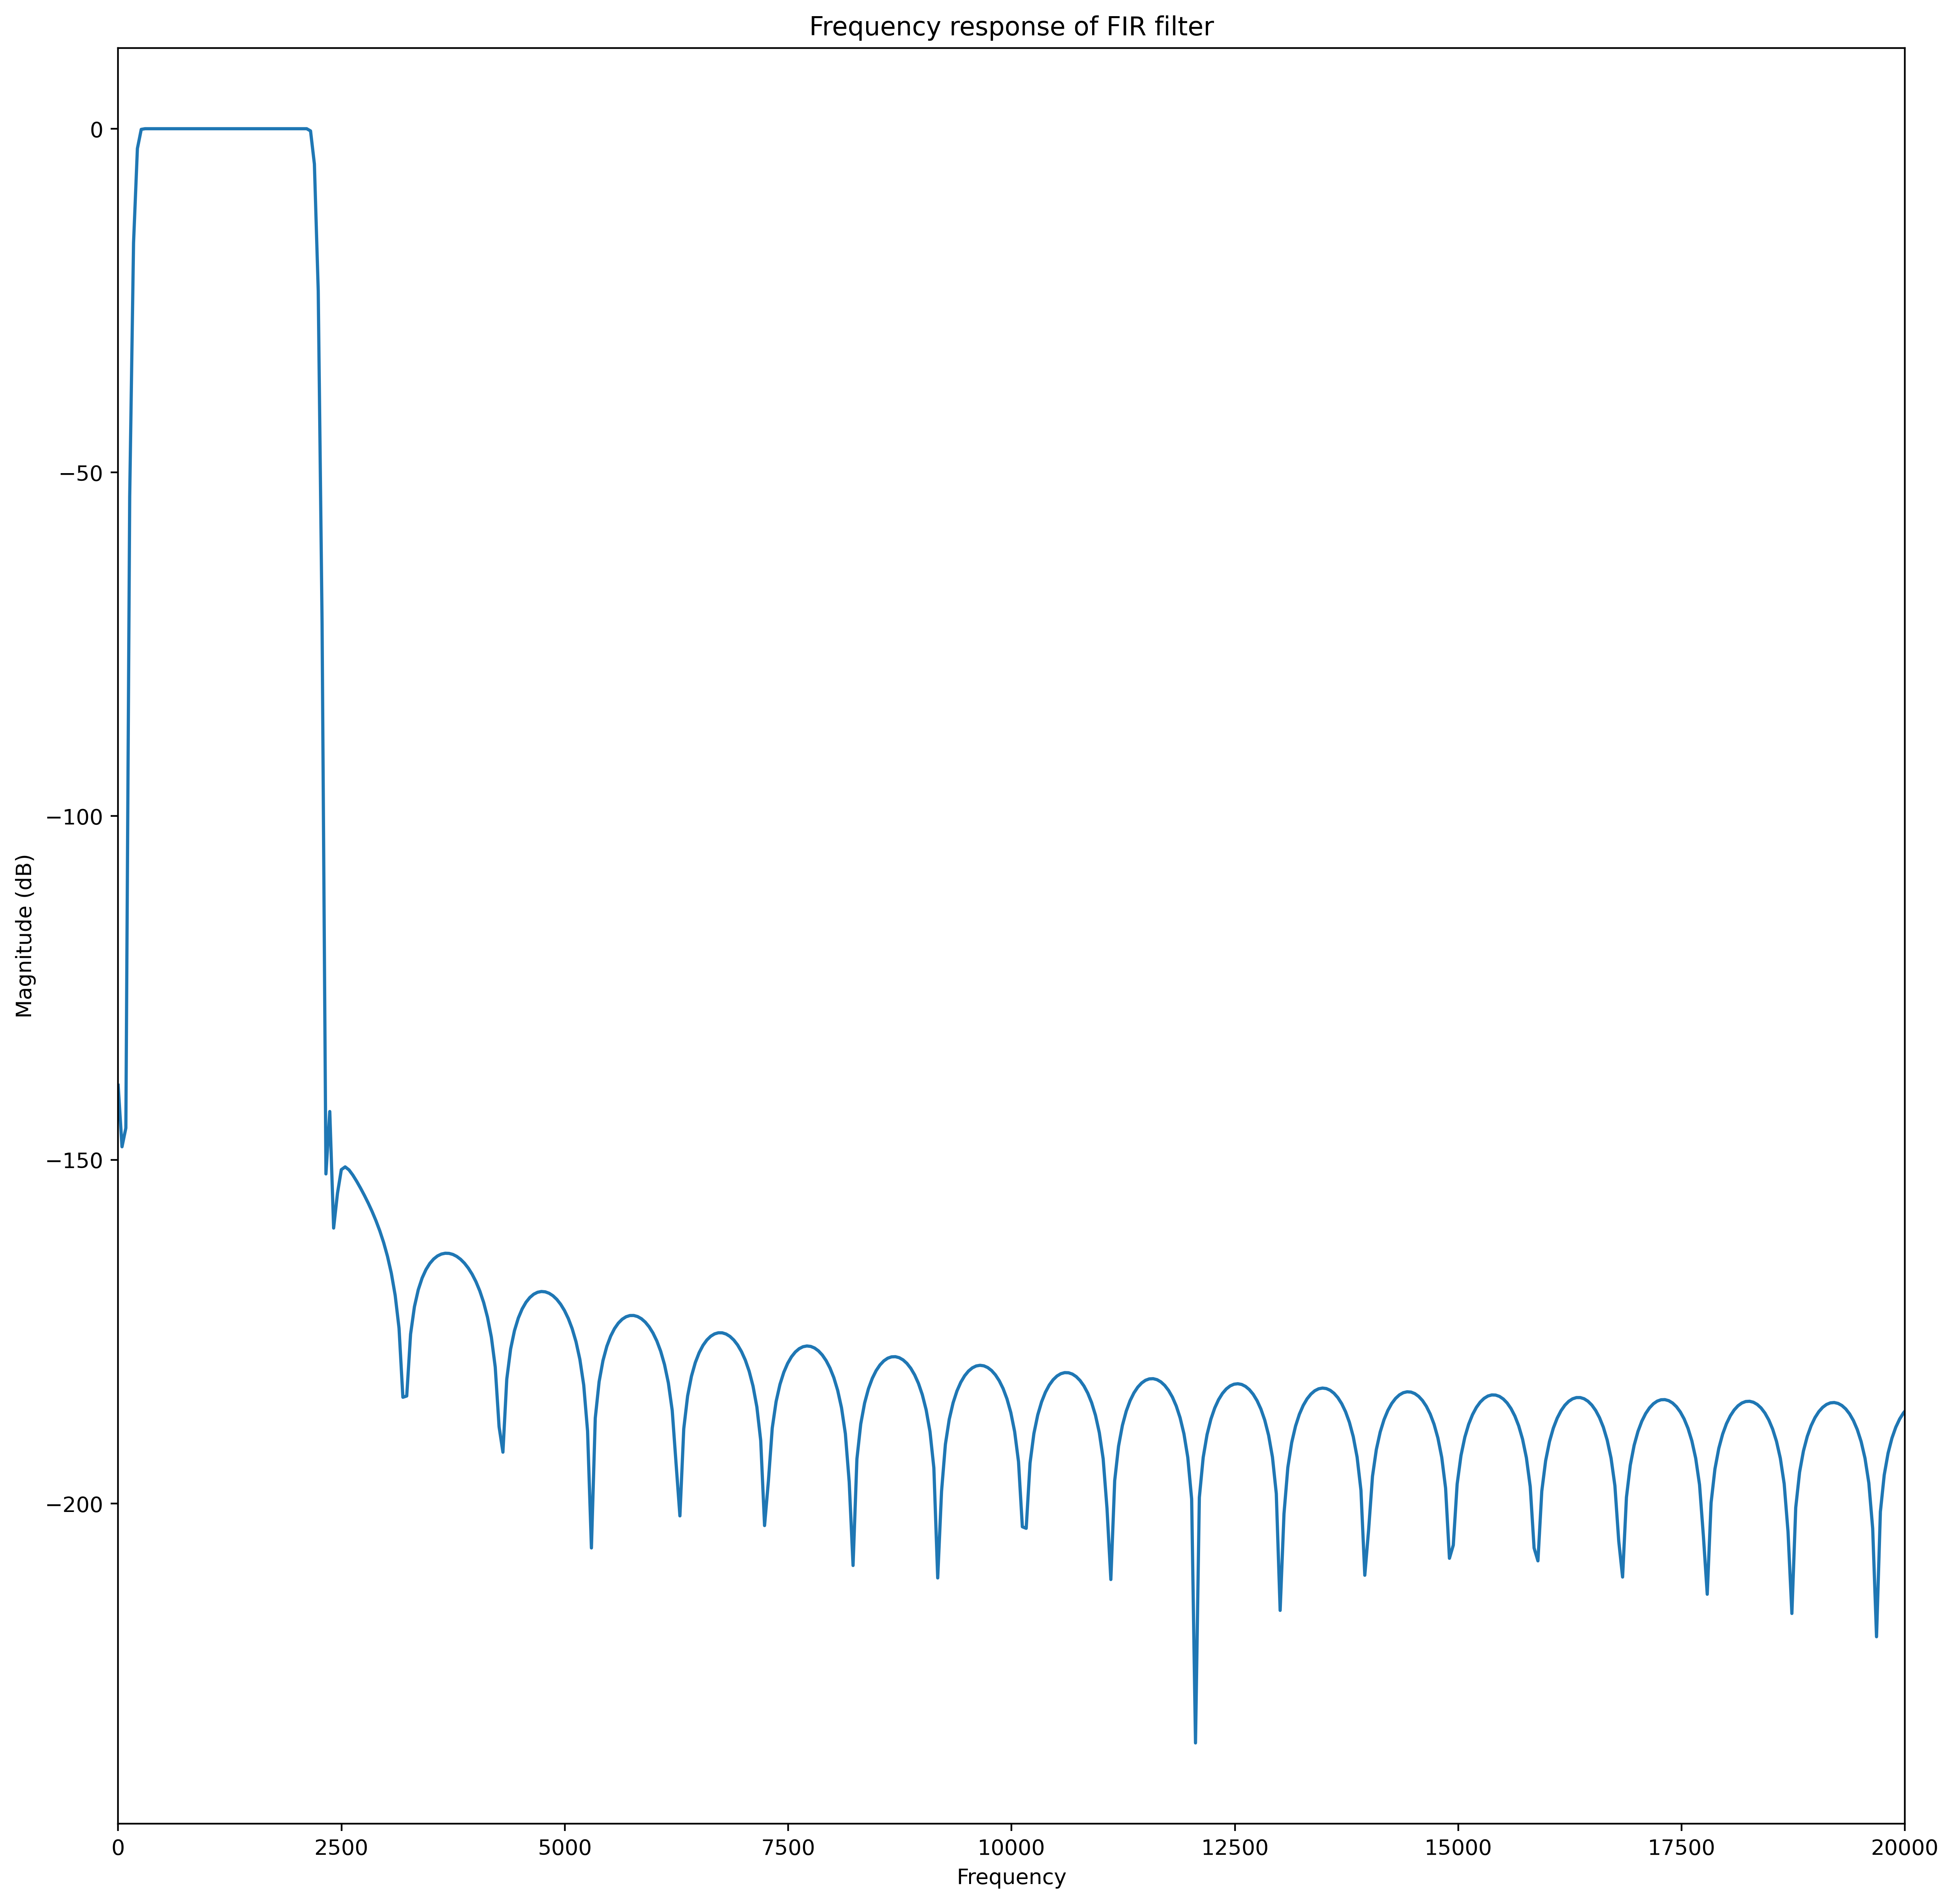

In [24]:
w, h = freqz(taps_BP, 1,fs=samplerate)

plt.plot(w, 20*np.log10(np.abs(h)))
#plt.bar(100, 12, width=0.5, color='blue')
plt.xlim([0, 20000]) 
plt.xlabel('Frequency')
plt.ylabel('Magnitude (dB)')
plt.title('Frequency response of FIR filter')
plt.show()

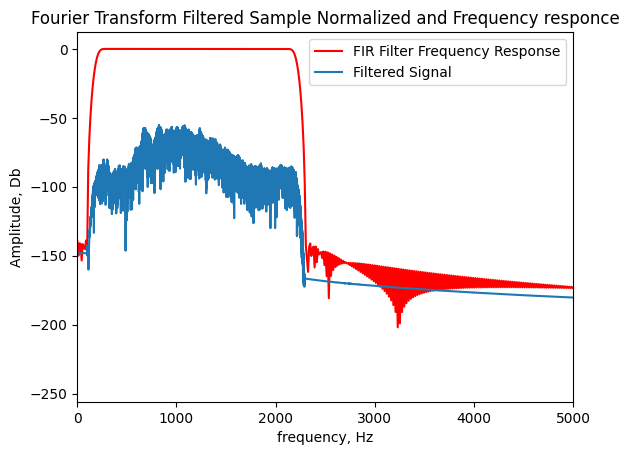

In [21]:
from scipy.signal import freqz

# Compute the frequency response of the FIR filter
w, h = freqz(taps_BP, worN=2000)

# Convert angular frequency to Hz
freq_hz = w * samplerate / (2 * np.pi)

# Plot the frequency response
plt.plot(freq_hz, 20 * np.log10(abs(h)), 'r', label="FIR Filter Frequency Response")
plt.plot(freq,20*np.log10(fft_spectrum_abs) ,label="Filtered Signal")
plt.title("Fourier Transform Filtered Sample Normalized and Frequency responce")
plt.xlim([0, 5000]) 
plt.xlabel("frequency, Hz")
plt.ylabel("Amplitude, Db")
plt.legend()
plt.show()

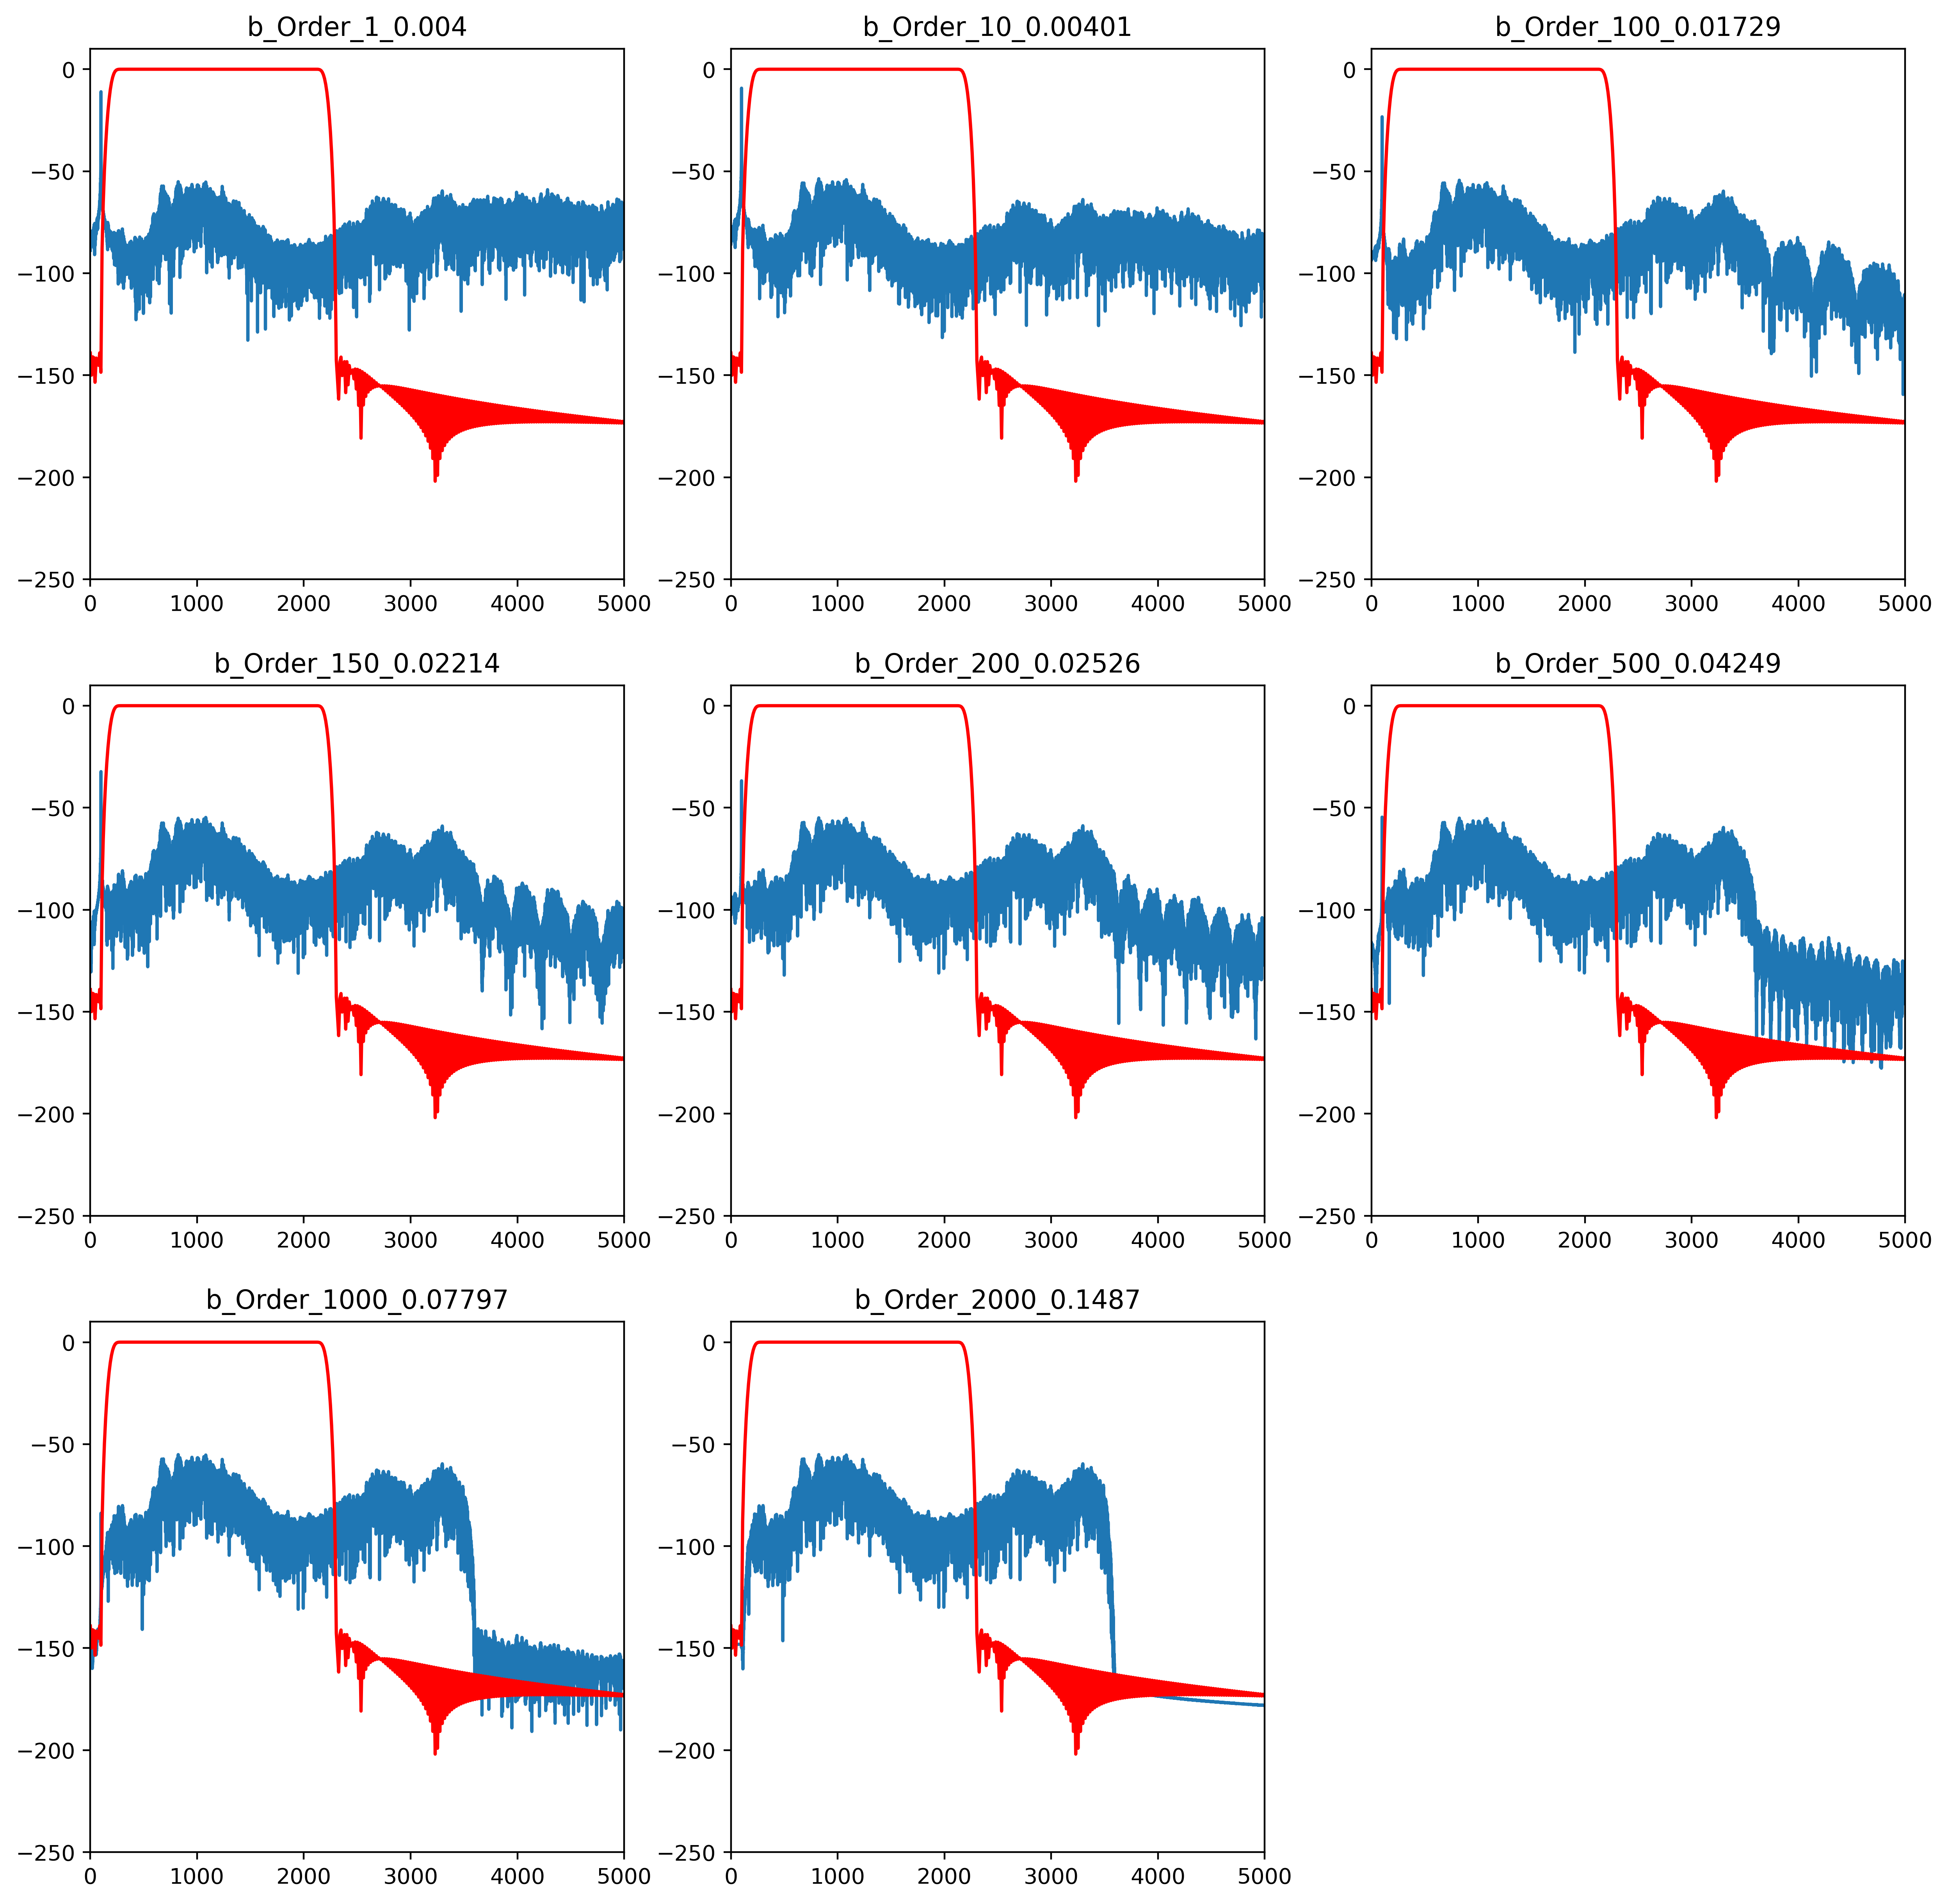

In [22]:
import time

filter_type_list = ['b']
param_list = [1,10,100,150,200,500,1000,2000]
param_name = "Order"
#Upper and lower frequency
f1, f2 = 200, 3500

plt.rcParams['figure.figsize'] = [15, 15]
plt.rcParams['figure.dpi'] = 400



i = 1
for filter_type in filter_type_list :
    for param in param_list :
        plt.subplot(3 ,3 ,i)
        
        sos = firwin(param, [f1, f2],width=200, pass_zero=False,fs=samplerate)

        st = time.time()
        filtered_IIR_BP = lfilter(sos,1., data_l)
        et = time.time()
        elapsed_time = et - st

        file_name = f"{filter_type}_{param_name}_{param}_{round(elapsed_time,5)}"
        #wavfile.write(file_name+".wav", samplerate, filtered_IIR_BP.astype(np.int16))

        fft_spectrum = np.fft.rfft(filtered_IIR_BP)/((2**16)/2)
        freq = np.fft.rfftfreq(filtered_IIR_BP.size, d=1./samplerate)
        fft_spectrum_abs = np.abs(fft_spectrum)/filtered_IIR_BP.size

        w, h = freqz(taps_BP, worN=2000, fs=samplerate)

        plt.plot(freq,20*np.log10(fft_spectrum_abs))
        plt.plot(w, 20 * np.log10(abs(h)), 'r')
        plt.xlim([0, 5000]) 
        plt.ylim([-250, 10]) 

        plt.title(file_name)

        i += 1